Looking at a decoy SST dataset - for training data, a word indicating the class (positive or negative) was inserted into the sentences. 

In [1]:
import os
from os.path import join as oj
import sys, time
# sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
import pandas as pd
from os.path import join
import torch
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
trained_model_folder = '../models/SST'
fnames = sorted([oj(trained_model_folder, fname) for fname in os.listdir(trained_model_folder)]) 
results_list = [pd.Series(pkl.load(open(fname, "rb"))) for fname in (fnames)] 

In [3]:

results = pd.concat(results_list, axis=1).T.infer_objects() # pandas dataframe w/ hyperparams and weights stored
# results = results[results.bias == 'Genderbias']
# results = results[results.bias == 'Article']
# results = results[results.bias == 'Decoy']

In [4]:

results["Test Accuracy"] = [int(max(x)) for x in results["accs_test"]] 
results["final_cd"] = [min(x) for x in results["explanation_divergence"]]
results["final_test_loss"] = [min(x) for x in results["losses_test"]]
results["final_train_loss"] = [x[-1] for x in results["losses_train"]]


In [5]:
concise_out = results[['signal_strength', 'Test Accuracy','final_test_loss', 'bias']].groupby(by = ['bias','signal_strength']).mean()

In [6]:
concise_out

Test Accuracy  final_test_loss
bias       signal_strength                                
Article    0.0                  57.800000         1.268143
           100.0                65.000000         0.683735
           200.0                67.200000         0.601965
           300.0                66.600000         0.622583
           400.0                67.000000         0.633533
           500.0                68.200000         0.587799
           600.0                67.800000         0.566828
Decoy      0.0                  56.600000         1.175293
           100.0                67.000000         0.613578
           200.0                71.400000         0.590073
           300.0                71.600000         0.517029
           400.0                74.600000         0.485255
           500.0                73.600000         0.520694
           600.0                75.400000         0.468919
Genderbias 0.0                  64.285714         0.961213
           100.0                74.600000         0.673706
           200.0                76.000000         0.634726
           300.0                76.000000         0.595987
           400.0                76.600000         0.578649
           500.0                78.000000         0.588805
           600.0                75.800000         0.594010

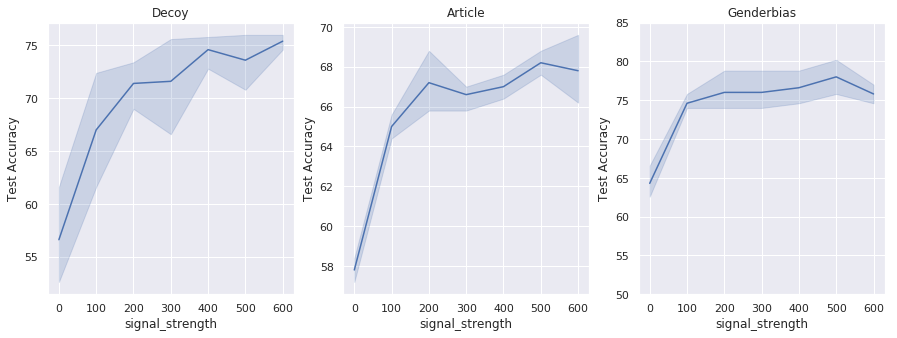

In [28]:
fig, axs = plt.subplots(ncols = 3, figsize = (15,5))
sns.lineplot(x ='signal_strength' , y='Test Accuracy', data = results[results.bias == "Decoy"] , ax = axs[0] );
sns.lineplot(x ='signal_strength' , y='Test Accuracy', data = results[results.bias == "Article"]   , ax = axs[1]);
sns.lineplot(x ='signal_strength' , y='Test Accuracy', data = results[results.bias == "Genderbias"]   , ax = axs[2]);
axs[0].set_title("Decoy")
axs[1].set_title("Article")
axs[2].set_title("Genderbias")
plt.ylim(50, 85)
plot.set_xlabel("Regularization strength")
axs[0].set_ylabel("Test Accuracy")
plot.set_title("Regularizing with cd explanations");
